# AutoSVC User Guide
Pacoo,2018-08-25

## 1. AutoSVC 函数解释

```
AutoSVC(clf_data,search_times=3,cv=3,step=1,n_jobs=4):
    # ...
    return  automan
```
- clf_data: 分类数据集,是一个字典,包含 
    - 'train_features' (No. of samples x No. of features)
    - 'train_labels'
    - 'test_features'  (No. of samples x No. of features)
    - 'test_labels'
- search_times: 网格搜索次数,次数越多,网格越密
- cv: 交叉验证的 折数
- step: 第一次网格搜索的步长(即网格大小),
    从第二次开始,搜索的步长是上一次的0.75
- n_jobs: 并行数
- automan:返回结果,是一个字典,包含
    - 'clf':最终选择出来的模型,是一个`sklearn.model_selection.GridSearchCV`
    - 'y_t':真实的测试集的标签,是一个1d的数组
    - 'y_p':预测的测试集的标签,是一个1d的数组
    - 'acc':分类准确率
    - 'clf_rep':分类报告,包含每个类的分类得分(精确率,召回率,f1),是一个 str
    - 'conf_mat':confusion matrix,是一个2d数组
    - 'misclf_index':被误分类测试样本的下标

## 2. AutoSVC 适用说明
### 2.1 AutoSVC 的由来
在做特征提取算法时,分类准确率是检验算法好坏的一个标准.由于众多论文使用的分类器是SVM,所以也用SVM做分类器.

SVC是SVM做分类时在sklearn的名称.众所周知,SVM的结果依赖于模型参数的设置; 同时,在没有任何更高深的理论或者 

对数据的先验知识下,调参 等同与 凭感觉地瞎蒙,大多数情况下,也只好这么蒙.**既然都是蒙,随便一点又怎样?** 将所 

有情况蒙一遍,岂不是得到了全局最优?简单又方便,傻瓜式操作!所以,网格搜索+交叉验证,就是最Practical的方法! 

( 当然,libsvm的官方上有份 libsvm简单使用指南,其中对"网格搜索"这种调参方法给出了更加具有说服力的解释. ) 

由于使用了"网格搜索",SVM便成了"自动SVM".
### 2.2 AutoSVC 适用场景
- 对分类准确率不要求做到"state-of-the-art",AutoSVC只能给个差强人意的结果(具体结果见下面例子)
- 对训练时间不要求,由于采用"网格搜索",训练时间将会非常非常非常长,尤其对于大数据量下
- 无人值守地自动调参;或者对SVM完成不懂的小白

## 3. AutoSVC 应用例子

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import  train_test_split
# -------------------------------------------------------
from AutoSVC import *

### 3.1 iris
探究 **不同的 cv,step,search_times 对最终分类准确率的影响**

In [11]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,iris.target,test_size=0.3)
clf_data = {
    'train_features':X_train,
    'train_labels':y_train,
    'test_features':X_test,
    'test_labels':y_test
}

In [12]:
automan = AutoSVC(clf_data)

1 th search:C = 32.0000,g = 0.0156,score = 0.981
2 th search:C = 32.0000,g = 0.0156,score = 0.981
3 th search:C = 32.0000,g = 0.0156,score = 0.981
accuracy:1.0000


In [13]:
automan = AutoSVC(clf_data,step=2,cv=5)

1 th search:C = 8.0000,g = 0.0312,score = 0.971
2 th search:C = 64.0000,g = 0.0312,score = 0.981
3 th search:C = 6.1688,g = 0.0312,score = 0.981
accuracy:1.0000


In [14]:
automan = AutoSVC(clf_data,step=1,cv=5)

1 th search:C = 64.0000,g = 0.0312,score = 0.981
2 th search:C = 22.6274,g = 0.0526,score = 0.981
3 th search:C = 22.6274,g = 0.0526,score = 0.981
accuracy:1.0000


In [15]:
automan = AutoSVC(clf_data,step=1,cv=3)

1 th search:C = 32.0000,g = 0.0156,score = 0.981
2 th search:C = 32.0000,g = 0.0156,score = 0.981
3 th search:C = 32.0000,g = 0.0156,score = 0.981
accuracy:1.0000


In [16]:
automan = AutoSVC(clf_data,step=2,cv=3)

1 th search:C = 8.0000,g = 0.0312,score = 0.971
2 th search:C = 8.0000,g = 0.0312,score = 0.971
3 th search:C = 38.0546,g = 0.0143,score = 0.981
accuracy:1.0000


In [17]:
automan = AutoSVC(clf_data,step=2,cv=5,search_times=2)

1 th search:C = 8.0000,g = 0.0312,score = 0.971
2 th search:C = 64.0000,g = 0.0312,score = 0.981
accuracy:1.0000


### 3.2 breast cancer

In [30]:
bc = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    bc.data,bc.target,test_size=0.3)
clf_data = {
    'train_features':X_train,
    'train_labels':y_train,
    'test_features':X_test,
    'test_labels':y_test
}
X_train.shape,y_train.shape

((398, 30), (398,))

In [31]:
automan = AutoSVC(clf_data)

1 th search:C = 64.0000,g = 0.0000,score = 0.957
2 th search:C = 64.0000,g = 0.0000,score = 0.960
3 th search:C = 64.0000,g = 0.0000,score = 0.960
accuracy:0.9532


### 3.3 wine

In [36]:
wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    wine.data,wine.target,test_size=0.3)
clf_data = {
    'train_features':X_train,
    'train_labels':y_train,
    'test_features':X_test,
    'test_labels':y_test
}
X_train.shape,y_train.shape

((124, 13), (124,))

In [37]:
automan = AutoSVC(clf_data)

1 th search:C = 512.0000,g = 0.0000,score = 0.855
2 th search:C = 2435.4962,g = 0.0000,score = 0.903
3 th search:C = 7844.6861,g = 0.0000,score = 0.927
accuracy:0.9444


### 3.4 digits

In [38]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data,digits.target,test_size=0.3)
clf_data = {
    'train_features':X_train,
    'train_labels':y_train,
    'test_features':X_test,
    'test_labels':y_test
}
X_train.shape,y_train.shape

((1257, 64), (1257,))

In [39]:
automan = AutoSVC(clf_data)

1 th search:C = 2.0000,g = 0.0010,score = 0.990
2 th search:C = 1.1892,g = 0.0016,score = 0.990
3 th search:C = 1.1892,g = 0.0016,score = 0.990
accuracy:0.9833


## 4. AutoSVC的返回结果

In [43]:
clf = automan['clf']
print(clf.best_params_)
print(clf.best_score_)

{'kernel': 'rbf', 'C': 1.189207115002721, 'gamma': 0.0016423758110424111}
0.9904534606205251


In [44]:
clf_rep = automan['clf_rep']
print(clf_rep)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        55
          1       1.00      1.00      1.00        58
          2       1.00      0.98      0.99        52
          3       1.00      1.00      1.00        55
          4       1.00      0.96      0.98        67
          5       0.98      0.96      0.97        51
          6       1.00      0.98      0.99        58
          7       0.98      1.00      0.99        53
          8       0.96      1.00      0.98        47
          9       0.89      0.95      0.92        44

avg / total       0.98      0.98      0.98       540



[[58.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 51.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0. 55.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 64.  0.  0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0. 49.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0. 57.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 53.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 47.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1. 41.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 55.]]


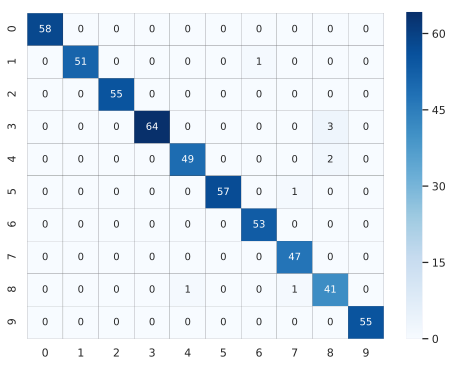

In [75]:
conf_mat = automan['conf_mat']
print(conf_mat)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,cmap='Blues',annot=True,fmt='.0f',linewidths='0.1',linecolor='black')

In [76]:
mis_index = automan['misclf_index']
print(mis_index)

[19, 31, 79, 94, 109, 229, 273, 481, 512]
